# Optical Character Recognition for MNIST handwritten characters

OCR (Optical Character Recognition) is another classification problem. In this example, we wish to recognise hand-written digits from the famous NIST dataset, each of which is presented as an $8\times 8$ array of pixel intensities.

We are just going to focus on the problem of classifying each rasterised digit scan, and not on the other steps which include tokenising text, basic data cleaning etc.

scikit-learn includes a built-in set of pre-formatted digits which we can use. The set is actually the MNIST (Modified NIST) set, but is functionally equivalent to the original NIST set, in relation to its classification challenges.

## Looking at the data

The data is included in `scikit-learn` and so can be loaded easily.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

As usual, we review the training data before doing anything else. In this case, the data takes the form of rasterised images, so it makes sense to display them as such, overlaying each image with the label it was assigned by a human.

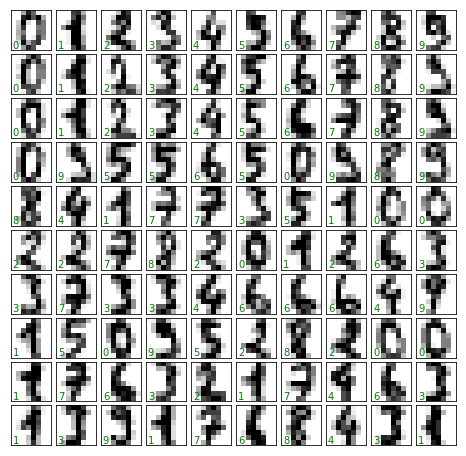

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here the data per digit is simply each pixel value within an 8x8 grid. The example grid below represents a zero.

In [3]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


While it is better to display each instance as an 8x8 grid, each instance needs to be flattened into a single row with 64 elements (columns), as below.

In [4]:
# The flattened data that is used to train the model.
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


There are some nice facilities to count the number of different digits.

In [5]:
# The target label
from collections import Counter # https://stackoverflow.com/a/2392948
c = Counter(digits.target)

print(c.items())

dict_items([(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)])


Summarising, the data has 1797 samples in 64 dimensions and 10 ($0,\ldots,9$) levels. The number of instances per level varies from 174 to 183.

## Classifying the digits using logistic regression

Logistic regression is an extension of regression where a change of variable is used to map the continuous (numerical-valued) prediction into categorical values for classification purposes.

In [6]:
from sklearn.model_selection import train_test_split
seed=2
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=seed, stratify=digits.target)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


We use logistic regression with an $\ell_2$-based regularisation penalty (recall Week 5's discussion of regularisation).

In [7]:
from sklearn.linear_model import LogisticRegression

# Get and configure a LogisticRegression object, with an L2 regularisation penalty
clf = LogisticRegression(penalty='l2')

# Fit the training data
clf.fit(Xtrain, ytrain)

# Using the beta parameters that have just been learned and are in clf, predict (recognise) the test data
ypred = clf.predict(Xtest)

We check the classification accuracy score and confusion matrix as we did for the Iris Data:

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ytest, ypred))
confusionMat = confusion_matrix(ytest, ypred)
print(confusionMat)

0.9422222222222222
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  1  0  0  1  0]
 [ 0  1 41  1  0  0  0  0  1  0]
 [ 0  0  0 43  0  0  0  1  2  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  1 44  0  0  0  1]
 [ 0  2  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  4  0  1  0  0  0  0 37  1]
 [ 0  0  0  3  1  0  0  0  2 39]]


As can be seen, the confusion matrix has several off-diagonal nonzero terms. Because there are 10 labels, the confusion matrix is slightly harder to visualise than the Iris data, which had just 3 labels. We can get a better sense of its layout by plotting it as an image. Because all the values are nonnegative, but there is a large difference in size from the smallest (0) to the largest (45) with most values being at each end of the range, the square root of the values maps better into the Blue colour space used in the plot below:

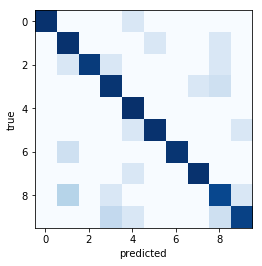

In [9]:
import numpy as np
plt.imshow(np.sqrt(confusionMat),cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');
plt.savefig("../../pic/logreg_digits_l2_confusionMatrix.pdf")

We might also take a look at some of the outputs along with their predicted labels. Matching labels are <font color='green'>green</font> (as before) and unmatched labels are <font color='red'>red</font>:

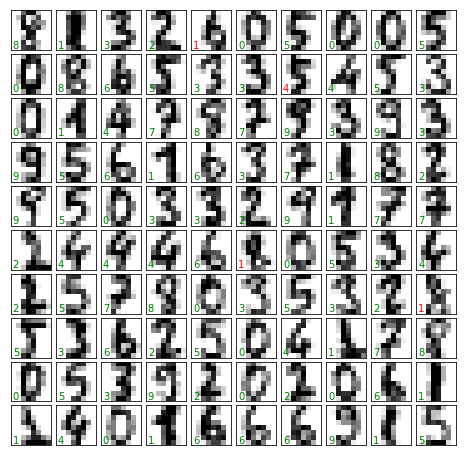

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])
fig.savefig("../../pic/digitsAccuracyCheck.pdf")

Where they do not match, it is arguable what the original writing was meant to represent!

## Exercise

Use the k-nearest-neighbours and decision tree algorithms with the NIST handwriting data and compare the results with the logistic regression one above.

1. Which algorithm, if any, seems to handle this data better? Give reasons for your answer.
2. One way of identifying outliers is to see whether they are discordant when different techniques are used. Which scanned digits do you think are outliers?
